<a href="https://colab.research.google.com/github/AnveshAnnepaga/AI_DS/blob/main/KNN_%2C_HyperParameter_and_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN ( K-Nearest Neighbors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n", cancer.keys())

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski')
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  4],
       [ 2, 69]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9473684210526315

<Axes: >

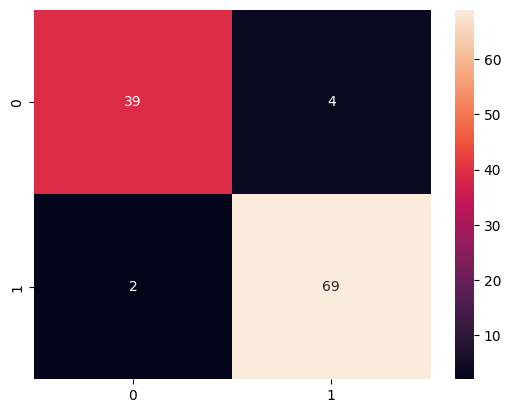

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

# Credit risk Datset

Business Scenario
A fintech company provides instant credit limits to customers using a mobile app.
Instead of using complex models, the company wants a similarity-based system that works like:
“Show me customers similar to this new customer, and decide risk accordingly.”
Challenges:
Customers are not easily separable by straight lines
Decisions depend on nearness, not formulas
Feature scale (income vs age) matters a lot
The system must be interactive and explainable


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
print(df.columns)
print(df["loan_status"].value_counts())


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')
loan_status
0    25473
1     7108
Name: count, dtype: int64


In [ ]:
X = df[["person_age", "person_income", "loan_amnt", "cb_person_cred_hist_length"]]
y = df["loan_status"]


In [ ]:
X = X.fillna(X.median())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
knn = KNeighborsClassifier(n_neighbors=25,metric='minkowski')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy is :",accuracy_score(y_test, y_pred))

print("Classification Report for KNN is :\n",classification_report(y_test, y_pred))

[[4898  174]
 [1047  398]]
Accuracy is : 0.8126438545342949
Classification Report for KNN is :
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      5072
           1       0.70      0.28      0.39      1445

    accuracy                           0.81      6517
   macro avg       0.76      0.62      0.64      6517
weighted avg       0.80      0.81      0.78      6517



In [ ]:
from sklearn.metrics import accuracy_score

for k in [3, 5, 7, 9, 15,50,5000]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"K={k} → Accuracy: {acc:.3f}")


K=3 → Accuracy: 0.778
K=5 → Accuracy: 0.797
K=7 → Accuracy: 0.803
K=9 → Accuracy: 0.805
K=15 → Accuracy: 0.813
K=50 → Accuracy: 0.809
K=5000 → Accuracy: 0.778


# Hyper Paramter Tunning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
best_params = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : ['auto', 'sqrt','log2']
}

In [ ]:
#using grid search cross validater()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=best_params, cv=5,scoring='accuracy',verbose = 2,n_jobs = -1)

grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(
    estimator=model,
    param_distributions=best_params,
    cv=5,
    verbose=2,
    n_jobs=-1,
)

rand.fit(X_train, y_train)

print(rand.best_score_)
print(rand.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_p

0.8440374505026765
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}


# **Ensemble learning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_model = DecisionTreeClassifier(max_depth=1)

model = AdaBoostClassifier(estimator=base_model,
                           n_estimators=50,
                           learning_rate=1.0,
                           random_state=42)
model.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8875

<Axes: >

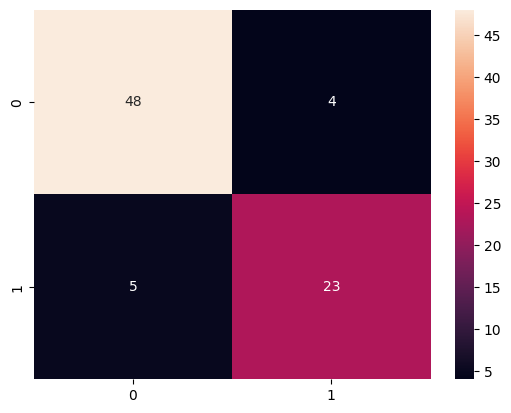

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
base_model = DecisionTreeClassifier(max_depth=1)
model = GradientBoostingClassifier(n_estimators=50,
                                   learning_rate=1.0,
                                   max_depth=3,
                                   random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=50, random_state=42)

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)


0.875

<Axes: >

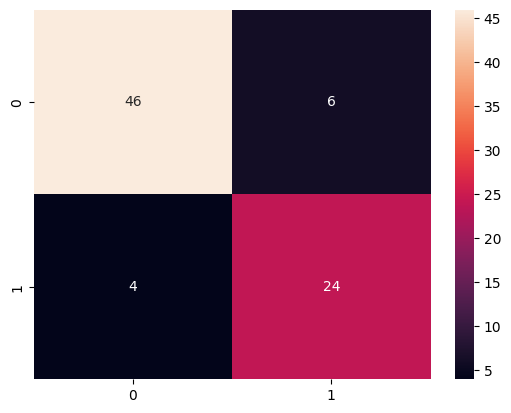

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier as XGBoostClassifier
from sklearn.metrics import accuracy_score
classifier=XGBoostClassifier(n_estimators=50,
                             max_depth=3,
                             learning_rate=1.0,
                             random_state=42,
                             subsample=0.8, #percentage of rows used in the tree
                             colsample_bytree=0.8, #percentage of features used in the tree
                             )
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9

<Axes: >

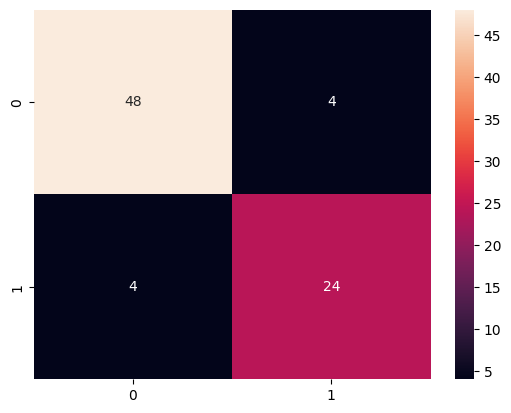

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

Data set:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

A subscription-based digital service company is facing customer churn, where users cancel their subscriptions after a few months.
Key challenges:
Customer behavior patterns are complex and non-linear
Some customers leave suddenly despite appearing loyal
A single model fails to capture small but important signals
Business wants a high-performance and scalable solution
The company already tried:
Logistic Regression
Decision Tree
Random Forest
…but results are not satisfactory.

Tasks:
Load the dataset and study customer attributes such as:
Tenure
Monthly charges
Contract type
Payment method
Identify the target variable and

explain its business meaning.

Build a baseline classification model using a tree-based approach.
Evaluate its performance using:
Accuracy
Confusion Matrix
Recall for churn customers

Focused customer retention programs

Build an ensemble model that improves predictions iteratively.
Train the model using historical customer data.
Observe how the model:
Focuses more on previously misclassified customers
Learns complex patterns gradually

Evaluate the model using:
Accuracy
Precision
Recall
F1-Score
Compare the results with the baseline model.

Analyze the following:
How many churn customers were correctly identified?
How many loyal customers were wrongly flagged?
Answer:
Is it better to wrongly flag a loyal customer?
Or miss a churn customer?
Which metric should the business prioritize and why?

Identify which customer features contribute most to churn prediction.
Explain how understanding feature importance helps business teams.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score,
    f1_score,
    classification_report
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier as XGBoostClassifier

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


/tmp/ipython-input-61331631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [ ]:
df.drop("customerID", axis=1, inplace=True)


In [ ]:
cat_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Results")
print("---------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall (Churn):", recall_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Results
---------------------
Accuracy: 0.7849538679914834
Recall (Churn): 0.553475935828877
Confusion Matrix:
 [[899 136]
 [167 207]]


In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting Results")
print("--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Results
--------------------------
Accuracy: 0.8112136266855926
Precision: 0.6888111888111889
Recall: 0.5267379679144385
F1 Score: 0.5969696969696969

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.69      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_gb)
    ]
})

results


,Model,Accuracy
0,Decision Tree,0.784954
1,Gradient Boosting,0.811214


In [ ]:
feature_importance = pd.Series(
    gb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
Contract,0.400917
tenure,0.144140
MonthlyCharges,0.139828
TotalCharges,0.080051
OnlineSecurity,0.078129
TechSupport,0.059704
PaymentMethod,0.022876
PaperlessBilling,0.019984
InternetService,0.015806
MultipleLines,0.010210


In [ ]:
important_features = feature_importance.head(5)
important_features


,0
Contract,0.400917
tenure,0.144140
MonthlyCharges,0.139828
TotalCharges,0.080051
OnlineSecurity,0.078129


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=4,
    learning_rate=1.0,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7636621717530163

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
cm



array([[881, 154],
       [179, 195]])

<Axes: >

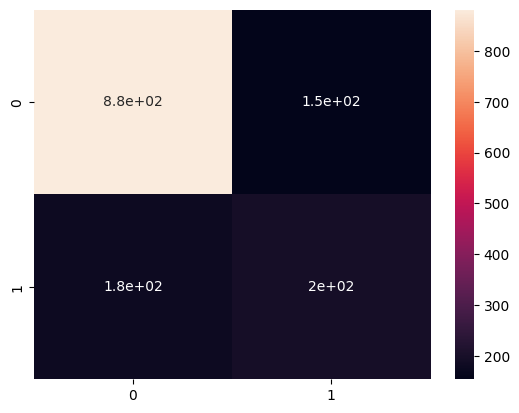

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Gradient Boosting","XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_xgb)
    ]
})

results


,Model,Accuracy
0,Decision Tree,0.784954
1,Gradient Boosting,0.811214
2,XGBoost,0.763662


### **Stacking (part of ensemble learning)**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [20]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#define base models

base_models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier(max_depth = 3)),
    ("KNN", KNeighborsClassifier(n_neighbors=5))
]

In [25]:
meta_model = LogisticRegression()

In [26]:
classifier = StackingClassifier(estimators=base_models,
                                final_estimator=meta_model,
                                cv=5
              )

classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression', LogisticRegression()),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=3)),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [27]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8625

<Axes: >

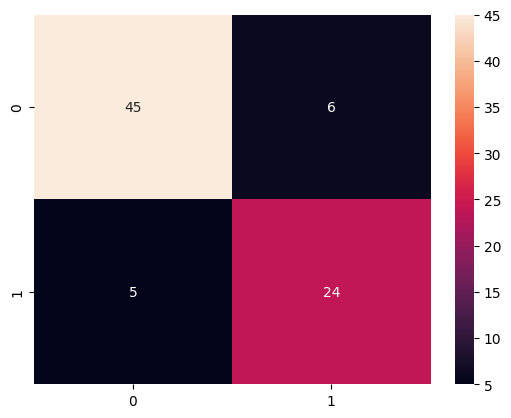

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

### **House Sales prediction**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [104]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/tmp/ipython-input-1178477003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-1178477003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [105]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


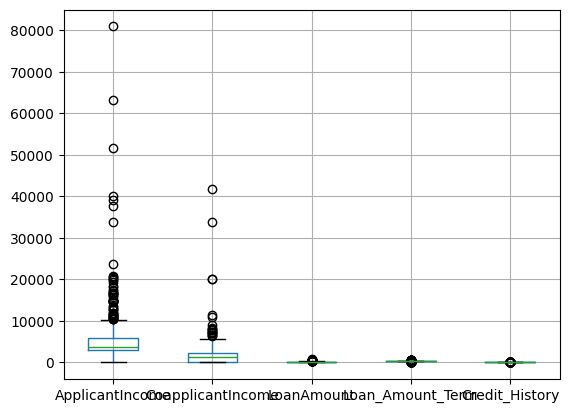

In [106]:
boxplots = df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History'])

In [107]:
df['ApplicantIncome']= np.log(df['ApplicantIncome'])
# df['CoapplicantIncome']= np.log(df['CoapplicantIncome'])
df['LoanAmount']=np.log(df['LoanAmount'])
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])

In [108]:
df['Loan_Status'] = df['Loan_Status'].map({"Y":1,"N":0})
df['Self_Employed'] = df['Self_Employed'].map({"Yes":1,"No":0})

In [109]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0,8.674026,0.0,4.986426,5.886104,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,0,8.430109,1508.0,4.852030,5.886104,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,1,8.006368,0.0,4.189655,5.886104,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,0,7.856707,2358.0,4.787492,5.886104,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,0,8.699515,0.0,4.948760,5.886104,1.0,Urban,1


In [110]:
X=df.iloc[:,5:11].values
y=df.iloc[:,-1].values


In [111]:
x

array([[0.        , 8.67402599,       -inf, 4.98642567, 5.88610403,
        1.        ],
       [0.        , 8.43010908, 7.31853955, 4.85203026, 5.88610403,
        1.        ],
       [1.        , 8.00636757,       -inf, 4.18965474, 5.88610403,
        1.        ],
       ...,
       [0.        , 8.99615656, 5.48063892, 5.53338949, 5.88610403,
        1.        ],
       [0.        , 8.93366418,       -inf, 5.23110862, 5.88610403,
        1.        ],
       [1.        , 8.43010908,       -inf, 4.89034913, 5.88610403,
        0.        ]])

In [112]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

0.7886178861788617


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

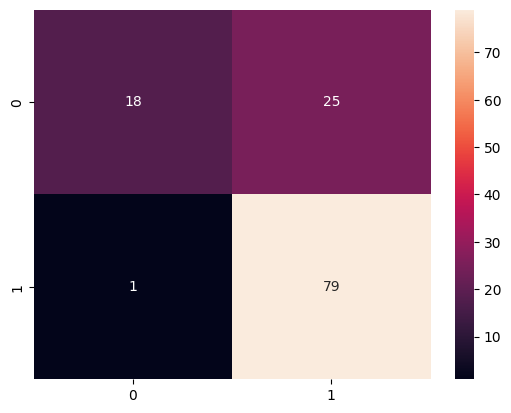

In [115]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr= lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(acc_lr)
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True)

0.7642276422764228


<Axes: >

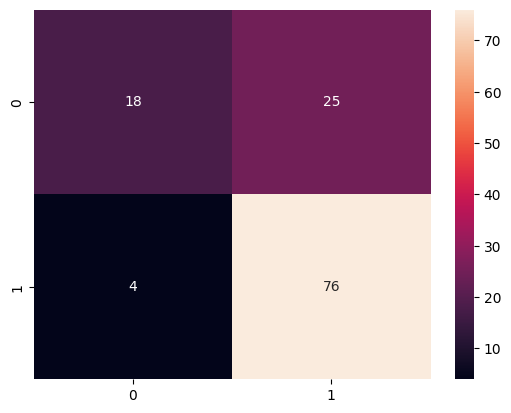

In [123]:
dec = DecisionTreeClassifier(max_depth=3)
dec.fit(X_train,y_train)
y_pred_dec = dec.predict(X_test)
acc_dec= accuracy_score(y_test, y_pred_dec)
print(acc_dec)
cm = confusion_matrix(y_test, y_pred_dec)
sns.heatmap(cm,annot=True)

0.7479674796747967


<Axes: >

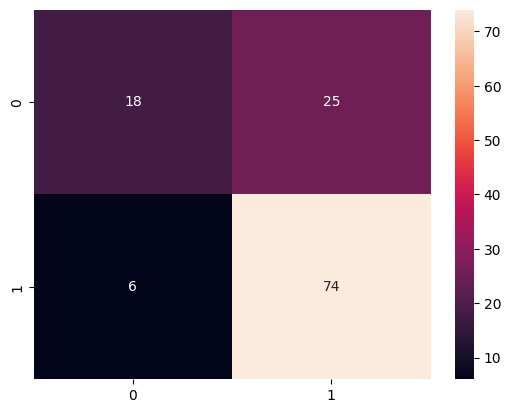

In [126]:
rdm = RandomForestClassifier(n_estimators=100)
rdm.fit(X_train,y_train)
y_pred_rdm = rdm.predict(X_test)
acc_rdm=accuracy_score(y_test, y_pred_rdm)
print(acc_rdm)
cm = confusion_matrix(y_test, y_pred_rdm)
sns.heatmap(cm,annot=True)

0.7073170731707317


<Axes: >

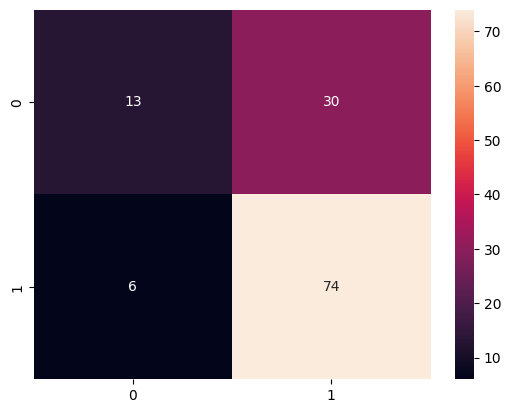

In [127]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
acc_knn=accuracy_score(y_test, y_pred_knn)
print(acc_knn)
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm,annot=True)

0.6504065040650406


<Axes: >

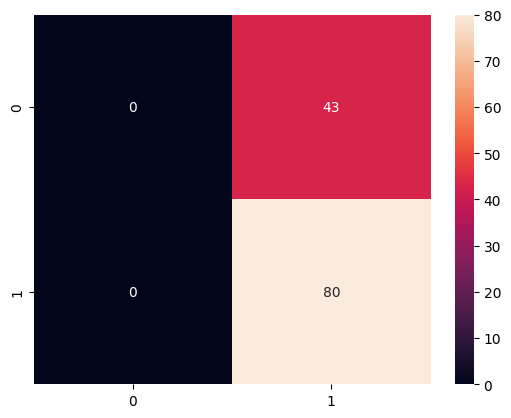

In [128]:
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
acc_svm=accuracy_score(y_test, y_pred_svm)
print(acc_svm)
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm,annot=True)

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
base_models=[
    ('xgb',XGBClassifier(n_estimators=100,max_depth=3)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('dt',DecisionTreeClassifier(max_depth=3)),
    ('rf',RandomForestClassifier(n_estimators=100,max_depth=3)),
    ('svm',SVC(kernel='rbf'))

]
meta_model=LogisticRegression()

In [135]:

classifier = StackingClassifier(estimators=base_models,
                                final_estimator=meta_model,
                                cv=10
              )

classifier.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_...
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('rf', RandomForestClassifier(max_depth=3)),
                               ('svm', SVC())],
                   final_estimator=LogisticRegression())

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7723577235772358

<Axes: >

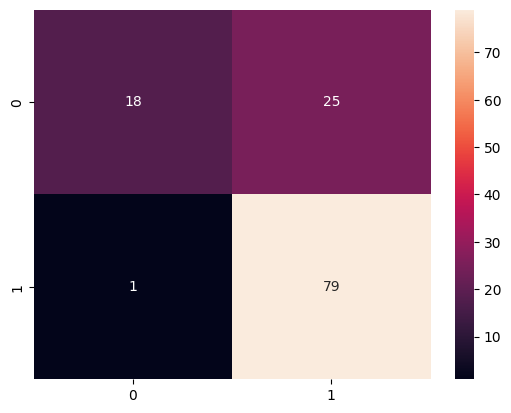

In [86]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)